<a href="https://colab.research.google.com/github/amalmon/cardio-vascular-risk-prediction/blob/main/cardio_vascular_risk_prediction_individual_notebook_by_AMAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.

Variables

Each attribute is a potential risk factor. 

There are both demographic, behavioral, and medical risk
factors.

Data Description

Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)
Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [2]:
#importing libraries
import pandas as pd
import numpy as np

In [3]:
#import & read dataset from drive 
df=pd.read_csv('/content/drive/MyDrive/Almabetter/capstone projects/CAPSTONE PROJECT 3 ML CLASSIFICATION/Copy of data_cardiovascular_risk.csv')

In [4]:
#front look of data set
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
#total outlook of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [6]:
#discription of columns
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
#looking for class distribution
df.TenYearCHD.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

##Data cleaning

In [8]:
#inspecting that is there any duplicate entries
df[df.duplicated()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


no duplicate entries

In [9]:
#looking for null values
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

* education,

  cigsperday,
  
  BPMeds,
  
  totchol,
  
  BMI,
  
  heart rate,
  
  glucose, columns have null values

In [10]:
#dataframe with values of cigsPerDay is null
df[df.cigsPerDay.isnull()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,422,55,1.0,F,YES,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,466,45,3.0,M,YES,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,469,42,1.0,M,YES,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,491,61,1.0,F,YES,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,538,41,1.0,F,YES,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,767,54,1.0,M,YES,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,1461,47,2.0,F,YES,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,1467,49,1.0,F,YES,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,1597,57,NaN,F,YES,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,1986,49,2.0,F,YES,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


* from this it is clear that the data of peoples with out cigerates per day where not no-smokers

  so, replacing null values with average

In [11]:
#filling null vales with mean
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(),inplace=True)

In [12]:
#for education column value counts
df.education.value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [13]:
#filling null vales of education column with mode
df['education'].fillna(df['education'].mode()[0],inplace=True)

In [14]:

df[df.education.isnull()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


null values of totchol with average value

null values of BMI with average value

null values of glucose lvl with average value

In [15]:
#filling totchol column null values by mean
df['totChol'].fillna(df['totChol'].mean(),inplace=True)

#filling BMI null values by mean
df['BMI'].fillna(df['BMI'].mean(),inplace= True)

#filling glucose null values by mean
df['glucose'].fillna(df['glucose'].mean(),inplace=True)

#filling heart rate null values by meadian
df['heartRate'].fillna(df['heartRate'].median(),inplace=True)

**BPmeds**

In [16]:
#counting number of each values of BPMeds
df.BPMeds.value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [17]:
#for dataframe with BPMeds value equel to zero
df[df['BPMeds']==0]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,3384,61,1.0,F,NO,0.0,0.0,0,1,0,217.0,182.0,86.0,26.980000,105.0,113.0,0
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.280000,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.960000,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.920000,73.0,72.0,1


we have systolic and diastolic pressure given.
In case of BPMeds null value there may be people with blood pressure issue so, we researched about systolic and diastolic blood pressure and found its close relation to the blood pressure issue.

here, **we are trying to categarize patients with null values of BPMed into whether they were belong to systolic and diastolic BP range of BP medication taking patinets or not**

In [18]:
#for analysing mean value of systolic & diastolic blood pressure of both class of BPMeds
df.groupby('BPMeds',as_index=False).agg({'sysBP':'mean','diaBP':'mean'})

,BPMeds,sysBP,diaBP
0,0.0,131.47366,82.438386
1,1.0,165.89000,96.590000


here, we can say that BPMeds=0 datapionts have bp range 82.43 - 131.47

& BPMeds=1 datapoints have bp range 96.59 - 165.89



In [19]:
#standerd deviation of sysBP of patients who taking medicine for Blood pressure
df[df['BPMeds']==1]['sysBP'].std()

26.2569452091665

here we checked mean systolic bp of bp patients it is 165.89

and its standard deviation is 26.25

so we are taking one standard deviation down from the mean value to decide the bp patients and non bp patients classification bar

rounded it as 140

and filling null values of BPMed with 1 if systolic bp > 140 else 0

In [20]:
#filling null values of BPMeds with zero if its sysBP is less than 140
df['BPMeds'] = df.apply(
    lambda x: 0 if np.isnan(x['BPMeds']) and x['sysBP']<140 else x['BPMeds'],
    axis=1
)

In [21]:
#filling null values of BPMeds with 1 if sysBP greater than 140
df['BPMeds'] = df.apply(
    lambda x: 1 if np.isnan(x['BPMeds']) and x['sysBP']>=140 else x['BPMeds'],
    axis=1
)

In [22]:
#cross checking the updations 
df[df['BPMeds'].isnull()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [23]:
#final data info. for EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

##**EDA**

###**SINGLE VARIATE ANALYSIS**

DRAWING ALL FEATURES HISTOGRAM DISTRIBUTION GRAPH


In [27]:
#importing library
import seaborn as sns
import matplotlib.pyplot as plt

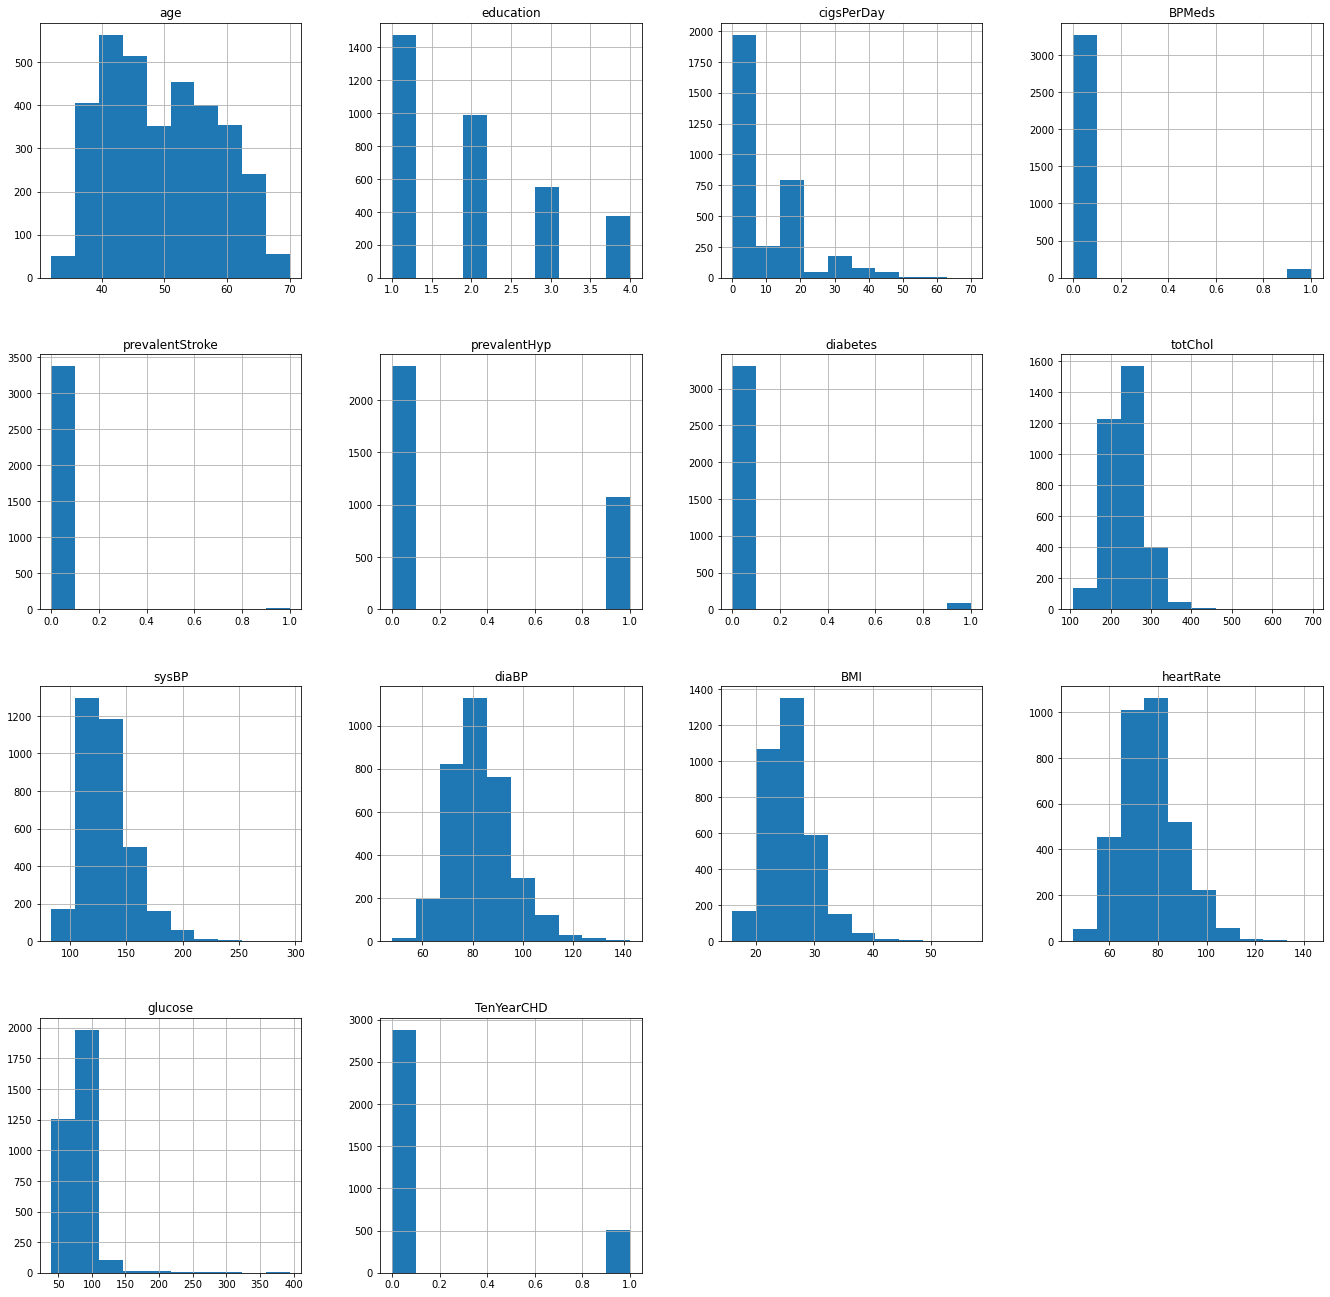

In [24]:
#distribution of all features
df.drop('id',axis=1).hist(figsize=[23,23])
plt.show()

* age column is almost showing a good distribution near to normal distribution
more peoples are belongs to education class 1 then it uniformly decreasing towards class 4
* in case of overall data set average cigarettes per day is 1-10 range.(Includes smokers and non-smokers)
* most of the peoples are not medicating for blood pressure issue.BP medicating peoples are under 200 in numbers
* The patient with previously suffered with a stroke is very less in number numerically it is 22
* Around 1000 patients are previously hypertensive
* Diabetic patients are very less in number somewhere around 100
* The total cholesterol level of patients is distributed well with a little skew. cholesterol level of almost 1600 peoples are in the range of 225-275
* most of the patient's systolic BP in a range of 100-150 and diastolic BP in a range of 75-85
* Body Mass Index is highly concentrated around 25 range
* most of the patient's heart rate are around 75-80
* glucose level highly concentrated around 100
* Ten year risk of CHD is less for pof peoples and it shows a class imbalance of dependent feature



In [24]:
df.prevalentStroke.value_counts()

0    3368
1      22
Name: prevalentStroke, dtype: int64

In [25]:
df.prevalentHyp.value_counts()

0    2321
1    1069
Name: prevalentHyp, dtype: int64

In [26]:
df.diabetes.value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

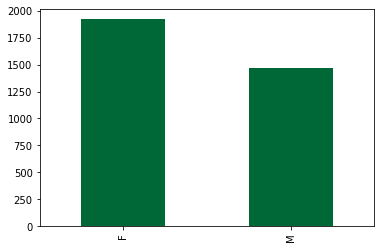

In [ ]:
#value count representation of sex
df['sex'].value_counts().plot(kind='bar',colormap='RdYlGn_r')

* female patients are more in number

In [27]:
df['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

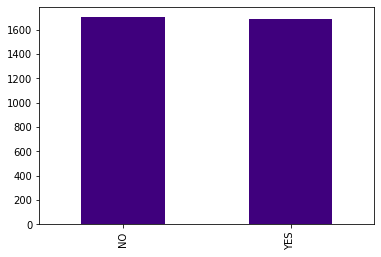

In [ ]:
#bar plot of smokers and non smokers
df['is_smoking'].value_counts().plot(kind='bar',colormap='Purples_r')

* smokers and non smokers are almost same in number. non-smokers are just 16 more than smokers

###**MULTI VARIATE ANALYSIS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


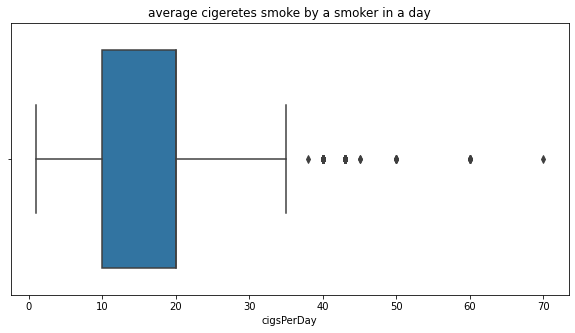

In [36]:
# box plot for range of number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(10,5))
plt.title('average cigeretes smoke by a smoker in a day')
sns.boxplot(df[df['is_smoking']=='YES']['cigsPerDay'])

* when we are taking the average exclusively of smokers, it will be the more accurate average of cigarettes per day
* it shows that a smoker will smoke 10-20 cigaretes per day on an average

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


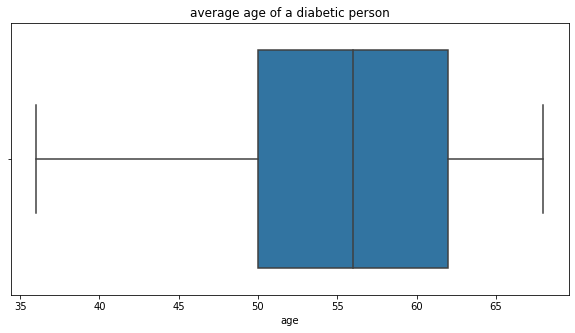

In [37]:
#box plot for range of age of diabetic person
plt.figure(figsize=(10,5))
plt.title('average age of a diabetic person')
sns.boxplot(df[df['diabetes']==1]['age'])

* age of diabetic person mostly come under range of 50-62
* average age of a diabetic person is 56

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


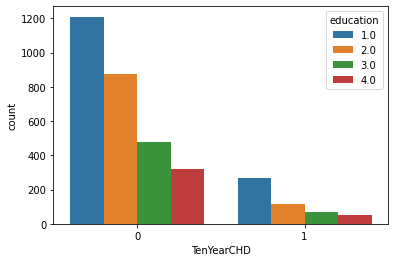

In [ ]:
#education class over 10 year CHD risk  
sns.countplot(df.TenYearCHD,hue=df.education)

* As per education category and ten year CHD the same trend we can see here

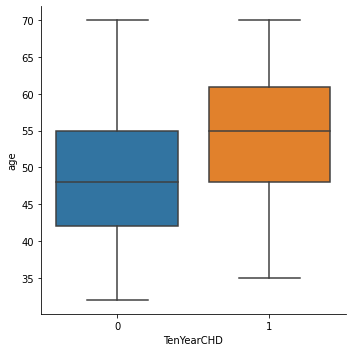

In [ ]:
#for age distribution of patients under risk and not 
sns.catplot(data=df, x="TenYearCHD", y="age", kind="box")

* Age of patients without risk of CHD for 10 years is more in a range of 42-55
* age of patients under risk is from 48 to 60

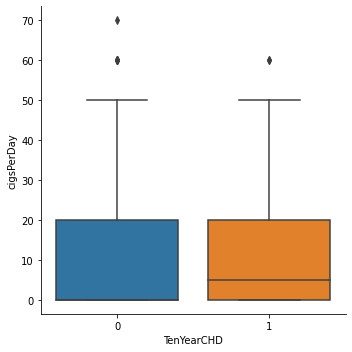

In [43]:
#for cigsPerDay distribution of patients under 10 year CHD risk and not
sns.catplot(data=df, x="TenYearCHD", y="cigsPerDay", kind="box")

* avrg. cigarettes per day of all kind of patients under 10 year CHD risk and not distributed more in 0-20 range
* but in case of class under risk average of distrubution come to 5

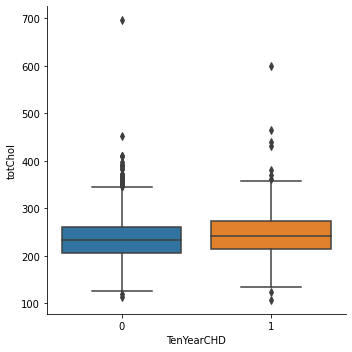

In [ ]:
#for totChol distribution of patients under 10 year CHD risk and not
sns.catplot(data=df, x="TenYearCHD", y="totChol", kind="box")

* cholastol level of patients under risk is higher

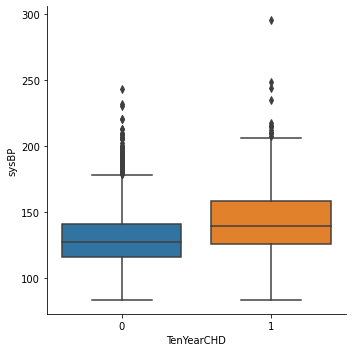

In [ ]:
#for sysBP distribution of patients under 10 year CHD risk and not
sns.catplot(data=df, x="TenYearCHD", y="sysBP", kind="box")

* systolic BP of patients under risk is higher

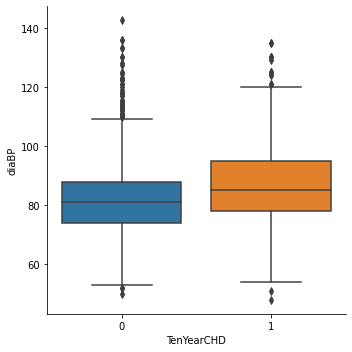

In [ ]:
#for diaBP distribution of patients under 10 year CHD risk and not
sns.catplot(data=df, x="TenYearCHD", y="diaBP", kind="box")

* Diastolic BP of patients under risk is higher

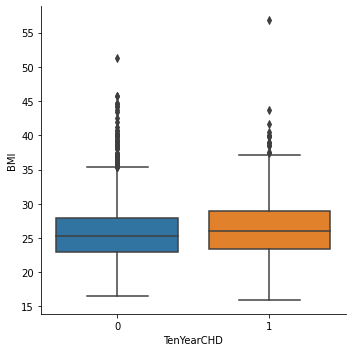

In [ ]:
#for BMI distribution of patients under 10 year CHD risk and not
sns.catplot(data=df, x="TenYearCHD", y="BMI", kind="box")

* BMI distribution patients under risk is slitly higher
* shows chances of obecity or over weight of risk patients

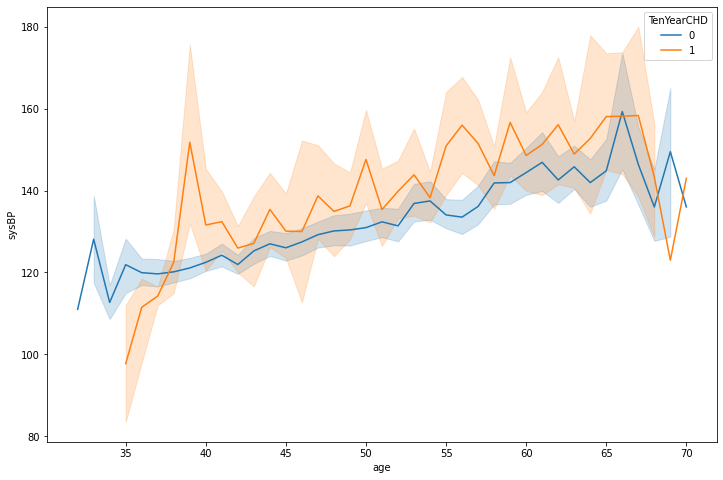

In [ ]:
#systolic BP variation over age for both targer class
plt.figure(figsize=(12,8))
sns.lineplot(x='age',y='sysBP',hue='TenYearCHD',data=df)

* the systolic BP of patients under both target variable class is increasing over age
* As per blood pressure there will be a same trend in diastolic BP

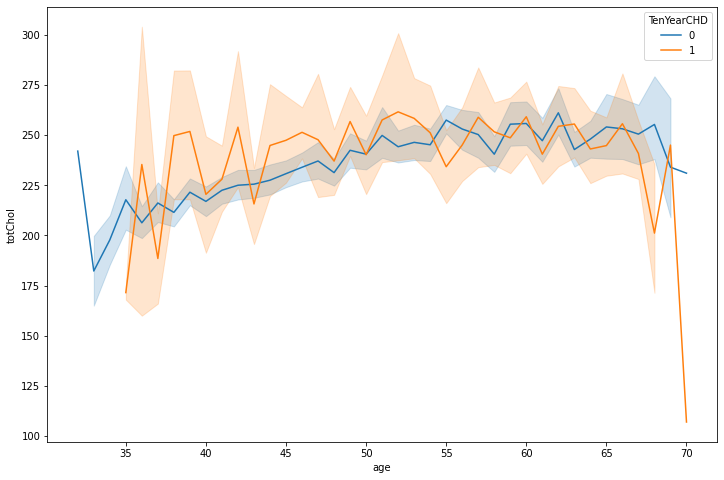

In [ ]:
#change of totchol over age
plt.figure(figsize=(12,8))
sns.lineplot(x='age',y='totChol',hue='TenYearCHD',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


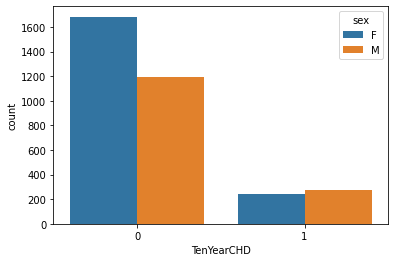

In [ ]:
#distribution of gender over both target class
sns.countplot(df.TenYearCHD,hue=df.sex)

* under non-risk category females are more
* under risk category males are more

<Figure size 720x360 with 0 Axes>

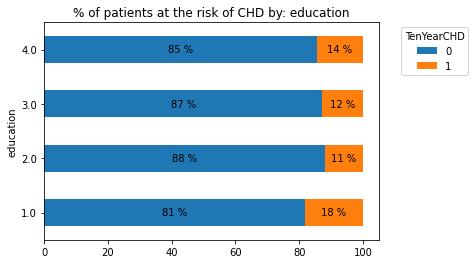

<Figure size 720x360 with 0 Axes>

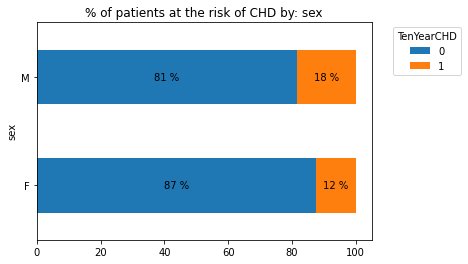

<Figure size 720x360 with 0 Axes>

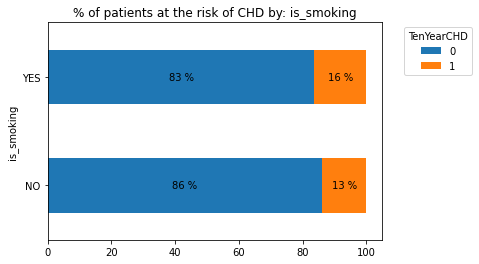

<Figure size 720x360 with 0 Axes>

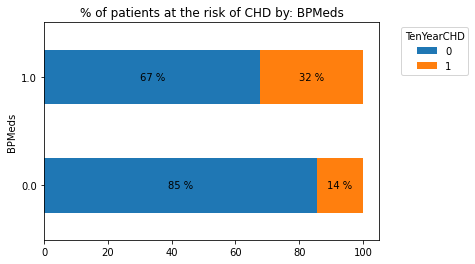

<Figure size 720x360 with 0 Axes>

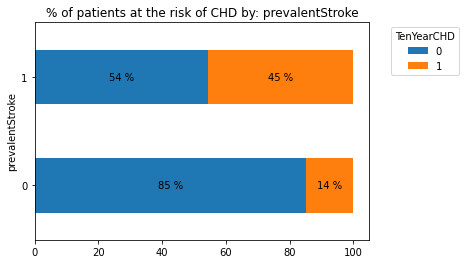

<Figure size 720x360 with 0 Axes>

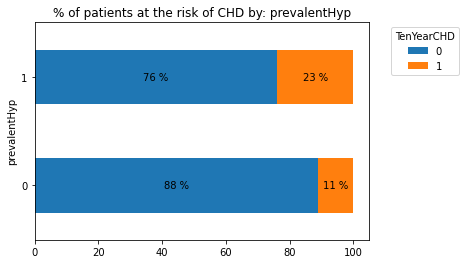

<Figure size 720x360 with 0 Axes>

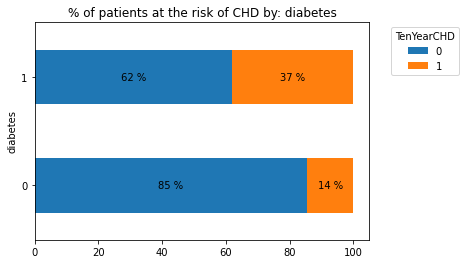

In [48]:
#stacked bar chart of percentage of patients under risk or not over  
categorical_var = ['education','sex', 'is_smoking','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']
dependent_var = ['TenYearCHD']
for i in categorical_var:
    x_var, y_var = i, dependent_var[0]
    plt.figure(figsize=(10,5))
    df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    df_grouped.plot.barh(stacked=True)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("% of patients at the risk of CHD by: "+i)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


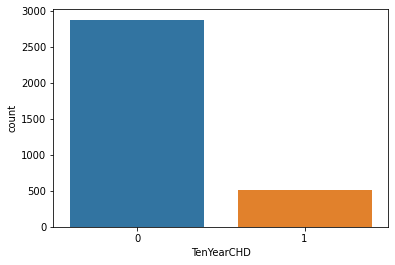

In [49]:
#count plot of target variable
sns.countplot(df.TenYearCHD)

* showing class imbalance in target variable

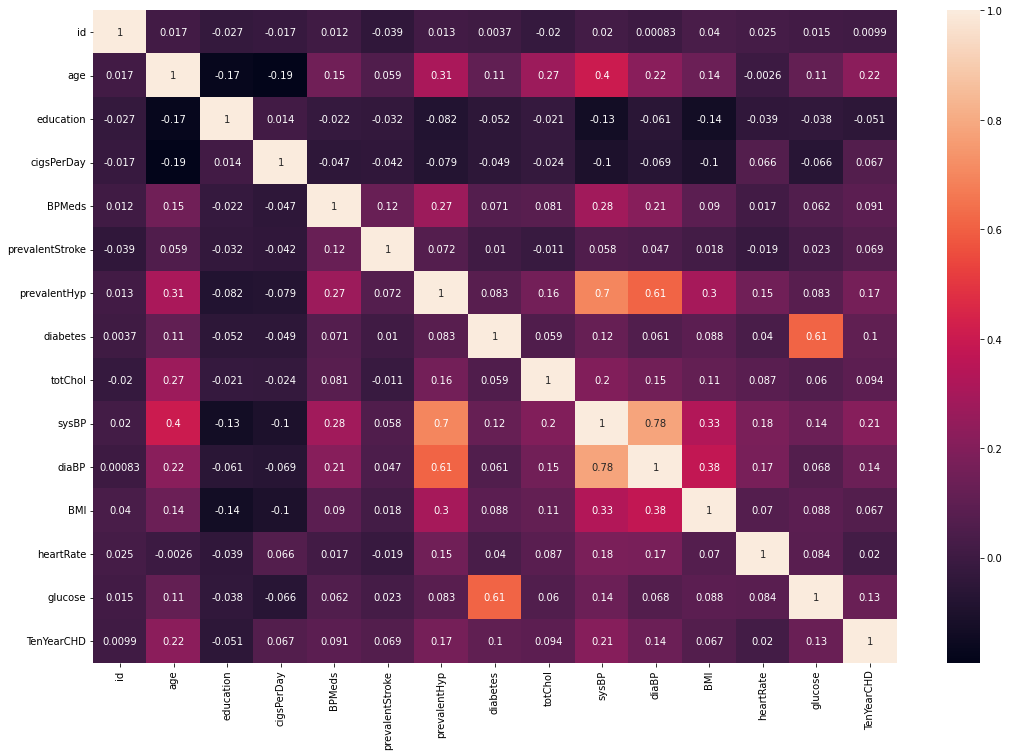

In [50]:
#correlation heat map
import seaborn as sns
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=True)

* age and systolic BP have a moderate correlation between target variable
* age have is more correlaton with all features
* pre valent hyper tension feature also have correlation with more features

In [ ]:
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.280000,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.960000,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.920000,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,1.0,0,1,0,191.0,167.0,105.0,23.010000,80.0,85.0,0


### **ENCODING FOR CATEGORICAL FEATURES**

LABEL ENCODING (SEX , IS_SMOKING)

In [ ]:
#importing library
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df.sex=label_encoder.fit_transform(df.sex)

In [ ]:
df.is_smoking=label_encoder.fit_transform(df.is_smoking)

ONE HOT ENCODING(Education)

In [ ]:
#Dummification
df=pd.get_dummies(df,columns=['education'],prefix='eductn_lvl')

In [ ]:
df

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,eductn_lvl_1.0,eductn_lvl_2.0,eductn_lvl_3.0,eductn_lvl_4.0
0,0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1,0,1,0,0
1,1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0,0,0,0,1
2,2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0,1,0,0,0
3,3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1,1,0,0,0
4,4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.280000,70.0,103.0,0,1,0,0,0
3386,3386,46,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.960000,80.0,84.0,0,1,0,0,0
3387,3387,44,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.920000,73.0,72.0,1,0,0,1,0
3388,3388,60,1,0,0.0,1.0,0,1,0,191.0,167.0,105.0,23.010000,80.0,85.0,0,1,0,0,0


### **TRAIN TEST SPLIT**

In [ ]:
#spliting data set as target variable and indipendent variables
X=df.drop('TenYearCHD',axis=1)
Y=df.TenYearCHD

In [ ]:
# split training and test datasets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1,stratify=Y)

In [ ]:
Y_test.value_counts()

0    576
1    102
Name: TenYearCHD, dtype: int64

### **SMOTE**

there is high class imbalance in data so it may affect our models accuracy.
* By **Synthetic Minority Over-sampling Technique** it can be over come upto an extend

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train,Y_train)

print('Original dataset shape', len(X_train))
print('Resampled dataset shape', len(x_smote))

Original dataset shape 2712
Resampled dataset shape 4606


## **MODELING**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression(fit_intercept=True, max_iter=10000)
clf_logistic.fit(x_smote,y_smote)

LogisticRegression(max_iter=10000)

In [ ]:
# Get the predicted classes
train_class_preds = clf_logistic.predict(x_smote)
test_class_preds = clf_logistic.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_smote)
test_accuracy = accuracy_score(test_class_preds,Y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8119843682153712
The accuracy on test data is  0.8112094395280236


In [ ]:
clf_logistic.score(X_test, Y_test)

0.8112094395280236

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


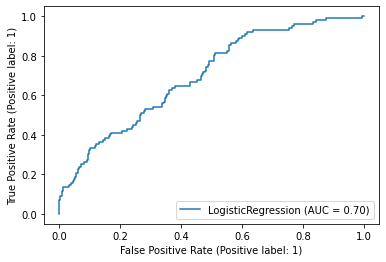

In [ ]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(clf_logistic, X_test, Y_test)

In [ ]:
# Confusion matrix
print(confusion_matrix(Y_test, test_class_preds))

[[522  54]
 [ 74  28]]


In [ ]:
#classification report of logistic model
print(classification_report(Y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       576
           1       0.34      0.27      0.30       102

    accuracy                           0.81       678
   macro avg       0.61      0.59      0.60       678
weighted avg       0.80      0.81      0.80       678



* Here we got a test score accuracy of 81.85% 
* area under of Reciver operating characteristic curve (AUC-ROC) of logistic regression model is 71% . 
* AUC of ROC shows good figure to support the model
* classification report of model shows a comparitively good f1 score for both class 
* f1 score for class 1 is 31% and class 0 is 90%
* precision of class 0  prediction is 88% and class 1 prediction is 36%
* recall of class 0 is 91% and class 1 is 27%
* in account of class imbalance model gives comparitively good result 

### **KNN**

* KNN is a distance based algorithm so, we have to scale the data set

In [ ]:
# Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# Scaling data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_smote_scaled = scaler.fit_transform(x_smote)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train_scaled, Y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_scaled, Y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test_scaled, Y_test) 

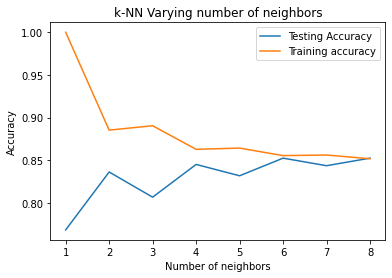

In [ ]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=6)

In [ ]:
# Fit the model
knn.fit(X_train_scaled,Y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
#test accuracy score
knn.score(X_test,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.8421828908554573

In [ ]:
# Let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
#confusion matrix
confusion_matrix(Y_test,y_pred)

array([[569,   7],
       [100,   2]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


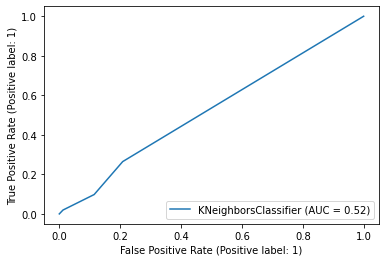

In [ ]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(knn, X_test, Y_test)

In [ ]:
#classification report of KNN model
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       576
           1       0.22      0.02      0.04       102

    accuracy                           0.84       678
   macro avg       0.54      0.50      0.48       678
weighted avg       0.76      0.84      0.78       678



* Here we got a test score accuracy of 84%
* area under of Reciver operating characteristic curve (AUC-ROC) of KNN model is 52.
* AUC of ROC  NOT support the model
* classification report of model shows The effect of class imbalance
* f1 score for class 1 is 4% and class 0 is 91%
* precision of class 0 prediction is 85% and class 1 prediction is 22%
* recall of class 0 is 99% and class 1 is 2%
* model didnt give a better acceptable evaluation matrix

**grid search cv**

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_smote_scaled,y_smote)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
knn_cv.best_score_

0.8558830941563563

In [ ]:
knn_cv.best_params_

{'n_neighbors': 2}

* here by grid search cv we got  n_neighbours as 2. not opting this value why because it may lead to over fiting and colapse the model

### **xG BOOST**

* checked with non smote dataframe and smote dataframe founded that smote data frame perfomes better for this model

In [ ]:
#importing xgb classifier
from xgboost import XGBClassifier

In [ ]:
#fitting the model
xgb_model = XGBClassifier().fit(x_smote, y_smote)

In [ ]:
# predict
xgb_train_y_pred=xgb_model.predict(x_smote)
xgb_test_y_predict = xgb_model.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(xgb_train_y_pred,y_smote)
test_accuracy = accuracy_score(xgb_test_y_predict,Y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8851498046026921
The accuracy on test data is  0.8377581120943953


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


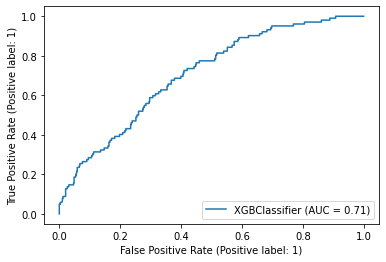

In [ ]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(xgb_model, X_test, Y_test)

In [ ]:
#for classification reprt of XGB model
print(classification_report(Y_test, xgb_test_y_predict))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       576
           1       0.39      0.15      0.21       102

    accuracy                           0.84       678
   macro avg       0.63      0.55      0.56       678
weighted avg       0.79      0.84      0.80       678



**randomize search cv**

In [ ]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
# Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
classifier=XGBClassifier()

In [ ]:
#calling random search
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=10,verbose=3)

In [ ]:
# fiting random search on X & Y
random_search.fit(X_,Y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=5,
              min_child_weight=7)

In [ ]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.25,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [ ]:
classifier=XGBClassifier(colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=5,
              min_child_weight=7)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_test,Y_test,cv=10)

In [ ]:
score

array([0.85294118, 0.88235294, 0.80882353, 0.85294118, 0.79411765,
       0.86764706, 0.83823529, 0.82352941, 0.85074627, 0.85074627])

In [ ]:
score.mean()

0.8422080772607551

In [ ]:
random_search_y_pred=random_search.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


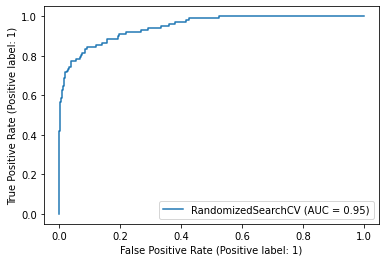

In [ ]:
plot_roc_curve(random_search, X_test, Y_test)

In [ ]:
#for classification reprt of XGB model
print(classification_report(Y_test, random_search_y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       576
           1       0.98      0.49      0.65       102

    accuracy                           0.92       678
   macro avg       0.95      0.74      0.80       678
weighted avg       0.93      0.92      0.91       678



XGBClassifier(
  * colsample_bytree=0.4, 
  * gamma=0.2, 
  * learning_rate=0.25, 
  *  max_depth=5,
  * min_child_weight=7)

### **RANDOM FOREST**


In [ ]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
rf_clf = RandomForestClassifier(n_estimators = 100) 

In [ ]:
# fiting model using the training set
rf_clf.fit(x_smote, y_smote)

RandomForestClassifier()

In [ ]:
# predict
rf_y_predict = rf_clf.predict(X_test)

In [ ]:
#test accuracy score
rf_clf.score(X_test, Y_test)

0.8407079646017699

In [ ]:
print('Accuracy score:', accuracy_score(Y_test, rf_y_predict))

Accuracy score: 0.8407079646017699


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


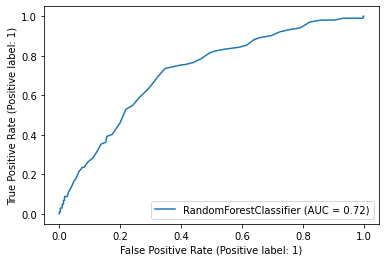

In [ ]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(rf_clf, X_test, Y_test)

In [ ]:
confusion_matrix(Y_test,rf_y_predict)

array([[559,  17],
       [ 91,  11]])

In [ ]:
print(classification_report(Y_test, rf_y_predict))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       576
           1       0.39      0.11      0.17       102

    accuracy                           0.84       678
   macro avg       0.63      0.54      0.54       678
weighted avg       0.79      0.84      0.80       678



* here in case of class 1 false positive is more but false negative is become little better than training model with out smote

* when come to our problem it is very important that recall of class 1 should be good number than precision


**GRID SEARCH CV**

In [ ]:
#number of trees in a random forest\
n_estimators = [int(x) for x in np.linspace(start=10,stop=80,num=10)]
#numder of features consider at every split
max_features=['auto','sqrt','log2']
#maximum number of levels in tree
max_depth=[3,5,7]
#minimum number of samples required to split a node
min_samples_split=[2,5]
#minimum number of samples required to each leaf node
min_samples_leaf=[1,2]
#method of selecting samples to retain each tree
bootstrap=[True, False]

In [ ]:
#create the param.grid
param_grid_rf={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
            'bootstrap':bootstrap}
print(param_grid_rf)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
classifier_rf=RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=classifier_rf,param_grid=param_grid_rf,cv=5,verbose=2,n_jobs=4)

In [ ]:
rf_grid.fit(x_smote,y_smote)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [ ]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 64}

In [ ]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=7, max_features='sqrt',
                       n_estimators=64)

In [ ]:
rf_grid.score(X_train,Y_train)

0.8532448377581121

In [ ]:
rf_grid.score(X_test,Y_test)

0.8008849557522124

In [ ]:
classifier_rf=RandomForestClassifier(bootstrap=False, max_depth=7, max_features='sqrt',
                       n_estimators=64)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier_rf,X_test,Y_test,cv=10)

In [ ]:
score

array([0.86764706, 0.83823529, 0.85294118, 0.83823529, 0.83823529,
       0.86764706, 0.83823529, 0.82352941, 0.88059701, 0.86567164])

In [ ]:
score.mean()

0.8510974539069359

In [ ]:
rf_grid_y_pred=rf_grid.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


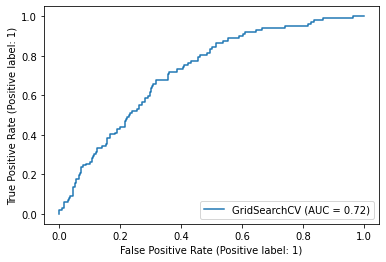

In [ ]:
plot_roc_curve(rf_grid, X_test, Y_test)

In [ ]:
print(classification_report(Y_test, rf_grid_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       576
           1       0.31      0.27      0.29       102

    accuracy                           0.80       678
   macro avg       0.59      0.58      0.59       678
weighted avg       0.79      0.80      0.80       678



**randamized search cv**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
classifier_rf=RandomForestClassifier()

In [ ]:
#calling random search
random_search_rf=RandomizedSearchCV(estimator=classifier_rf,param_distributions=param_grid_rf,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=10,verbose=3)

In [ ]:
# fiting random search on X & Y
random_search_rf.fit(x_smote,y_smote)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search_rf.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=7, max_features='log2',
                       min_samples_leaf=2, n_estimators=64)

In [ ]:
random_search_rf.best_params_

{'n_estimators': 64,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 7,
 'bootstrap': False}

In [ ]:
classifier_rf=RandomForestClassifier(bootstrap=False, max_depth=7, max_features='log2',
                       min_samples_leaf=2, n_estimators=64)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier_rf,X_test,Y_test,cv=10)

In [ ]:
score

array([0.86764706, 0.85294118, 0.85294118, 0.83823529, 0.85294118,
       0.86764706, 0.83823529, 0.82352941, 0.86567164, 0.88059701])

In [ ]:
score.mean()

0.8540386303775243

In [ ]:
random_search_rf_y_pred=random_search_rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


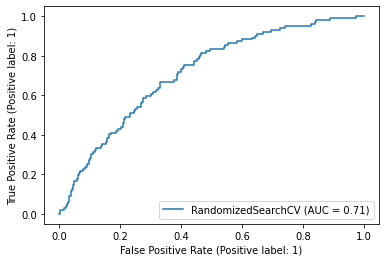

In [ ]:
plot_roc_curve(random_search_rf, X_test, Y_test)

In [ ]:
#for classification reprt of model
print(classification_report(Y_test, random_search_rf_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       576
           1       0.33      0.28      0.31       102

    accuracy                           0.81       678
   macro avg       0.60      0.59      0.60       678
weighted avg       0.79      0.81      0.80       678

